<h1 align="center">Kelompok: Saya Budiman</h1>
<p align="center">
    <b>Andika Rahman Teja (5025221022) || Mohammad Idris Arif Budiman (5025221114) || Rafli Raihan Pramudya (5025221266)</b>
</p>



In [3]:
import time
import psutil
import numpy as np
import matplotlib.pyplot as plt
from npuzzle import NPuzzleState
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from sys import maxsize
rc('animation', html='html5')

import warnings
warnings.filterwarnings('ignore')

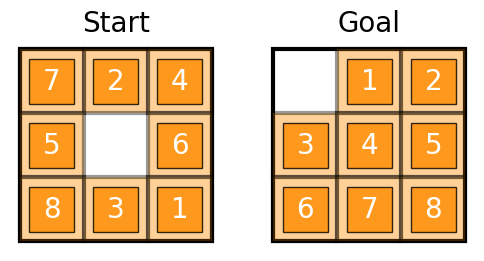

In [4]:
# State Puzzle
start_tiles = [
    7,2,4,
    5,0,6,
    8,3,1]
goal_tiles = [
    0,1,2,
    3,4,5,
    6,7,8]

start_state = NPuzzleState(tiles=start_tiles)
goal_state = NPuzzleState(tiles=goal_tiles)
fig, ax = plt.subplots(1,2,figsize=(6,3))
start_state.plot(ax[0], 'Start')
goal_state.plot(ax[1],'Goal')
plt.show()

# Fungsi Heuristik

[Fungsi heuristik](https://theory.stanford.edu/~amitp/GameProgramming/Heuristics.html) dalam Algoritma _Informed Search_ adalah fungsi yang memberikan perkiraan atau estimasi biaya yang diperlukan untuk mencapai tujuan dalam masalah pencarian berdasarkan informasi yang tersedia.

Terdapat berbagai metode umum untuk menentukan fungsi heuristik, yakni:
- `Manhattan Distance`
<p align="center"><img src = "https://datagy.io/wp-content/uploads/2022/01/image-2.webp" width = 100% height= 100%> </h1>
<p align="center"><img src = "https://www.101computing.net/wp/wp-content/uploads/taxicab-manhattan-grid-layout-paths.gif" width = 100% height= 100%> </h1>


- `Euclidean Distance`
<p align="center"><img src = "https://miro.medium.com/v2/resize:fit:963/0*vjZlMGA9wN8uaXG2.jpg" width = 100% height= 100%> </h1>

<p align="center"><img src = "https://uploads-cdn.omnicalculator.com/images/manhattan_distance.png?width=425&enlarge=0&format=jpeg" width = 100% height= 100%> </h1>


Selain itu, terdapat beberapa metode khusus untuk menentukan fungsi heuristik. Salah satu contohnya adalah `menghitung banyaknya kotak yang salah tempat` pada kasus **N-Puzzle**

# IDA* Algorithm

Compilation Time: 56.680044412612915 seconds
Number of Iterations: 1265719
Memory Allocation: 1265661
SUCCESS

Number of Nodes Explored: 1265738
Step 1: Action - 
[[7 2 4]
 [5 0 6]
 [8 3 1]]


Step 2: Action - left
[[7 2 4]
 [0 5 6]
 [8 3 1]]


Step 3: Action - up
[[0 2 4]
 [7 5 6]
 [8 3 1]]


Step 4: Action - right
[[2 0 4]
 [7 5 6]
 [8 3 1]]


Step 5: Action - down
[[2 5 4]
 [7 0 6]
 [8 3 1]]


Step 6: Action - down
[[2 5 4]
 [7 3 6]
 [8 0 1]]


Step 7: Action - left
[[2 5 4]
 [7 3 6]
 [0 8 1]]


Step 8: Action - up
[[2 5 4]
 [0 3 6]
 [7 8 1]]


Step 9: Action - right
[[2 5 4]
 [3 0 6]
 [7 8 1]]


Step 10: Action - right
[[2 5 4]
 [3 6 0]
 [7 8 1]]


Step 11: Action - up
[[2 5 0]
 [3 6 4]
 [7 8 1]]


Step 12: Action - left
[[2 0 5]
 [3 6 4]
 [7 8 1]]


Step 13: Action - left
[[0 2 5]
 [3 6 4]
 [7 8 1]]


Step 14: Action - down
[[3 2 5]
 [0 6 4]
 [7 8 1]]


Step 15: Action - right
[[3 2 5]
 [6 0 4]
 [7 8 1]]


Step 16: Action - right
[[3 2 5]
 [6 4 0]
 [7 8 1]]


Step 17: Action - dow

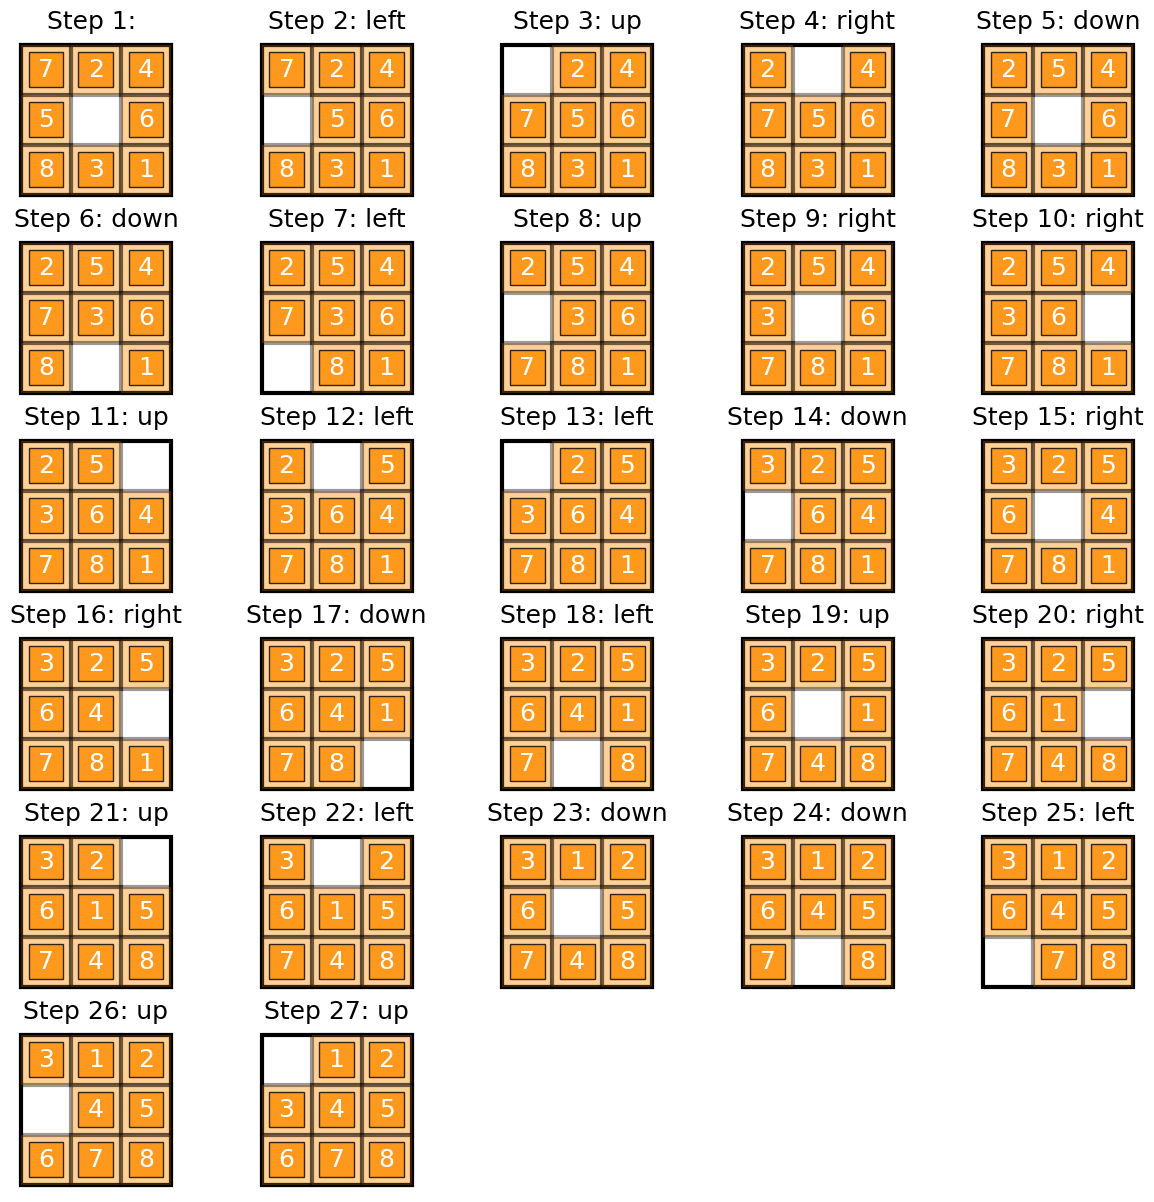

In [7]:
class Node:
    def __init__(self, tiles=np.array([]), parent=None, g=0, h=0, f=0, action=""):
        self.tiles = tiles
        self.g = g
        self.h = h
        self.f = f
        self.parent = parent
        self.action = action

    def isGoal(self):
        return np.array_equal(self.tiles, goal.tiles)

    def findBlank(self):
        for i in range(n):
            for j in range(n):
                if self.tiles[i][j] == 0:
                    return i, j

    def hgf(self):
        sum = 0
        if self == start:
            for i in range(n):
                for j in range(n):
                    if self.tiles[i][j] == 0:
                        continue
                    else:
                        x, y = findGoal(self.tiles[i][j])
                        sum += abs(x - i) + abs(y - j)
            self.h = sum
            self.g = 0
            self.f = sum
        else:
            for i in range(n):
                for j in range(n):
                    if self.tiles[i][j] == 0:
                        continue
                    else:
                        x, y = findGoal(self.tiles[i][j])
                        sum += abs(x - i) + abs(y - j)
            self.h = sum
            self.g = self.parent.g + 1
            self.f = self.g + sum

    def genChildren(self):
        global node_count
        x, y = self.findBlank()
        newTiles = []
        actions = []
        if (x + 1) < n:
            new = np.copy(self.tiles)
            new[x][y] = new[x + 1][y]
            new[x + 1][y] = 0
            newTiles.append(new)
            actions.append("down")
        if (x - 1) > -1:
            new = np.copy(self.tiles)
            new[x][y] = new[x - 1][y]
            new[x - 1][y] = 0
            newTiles.append(new)
            actions.append("up")
        if (y + 1) < n:
            new = np.copy(self.tiles)
            new[x][y] = new[x][y + 1]
            new[x][y + 1] = 0
            newTiles.append(new)
            actions.append("right")
        if (y - 1) > -1:
            new = np.copy(self.tiles)
            new[x][y] = new[x][y - 1]
            new[x][y - 1] = 0
            newTiles.append(new)
            actions.append("left")
        ret = []
        for i in range(len(newTiles)):
            child = Node(newTiles[i], self, action=actions[i])
            child.hgf()
            ret.append(child)
            node_count += 1
        return ret

    def isExp(self, exp):
        for i in exp:
            if np.array_equal(self.tiles, i.tiles) and (i.f <= self.f):
                return i
        return None

start = Node()
goal = Node()
method = ""
m = 0
n = 0
node_count = 0
iteration_count = 0
memory_allocation = 0
actions_ans = []

def set_hardcoded_data():
    global method, m, n, goal, start
    method = "IDA*"
    m = 100
    n = 3
    start.tiles = np.array([
        [7, 2, 4],
        [5, 0, 6],
        [8, 3, 1]
    ])

    goal.tiles = np.array([
        [0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]
    ])

    start.hgf()

def findOpt(lst):
    opt = lst[0]
    index = 0
    for i in range(len(lst)):
        if lst[i].f < opt.f:
            opt = lst[i]
            index = i
    return opt, index

def findGoal(num):
    global goal
    for i in range(n):
        for j in range(n):
            if goal.tiles[i][j] == num:
                return i, j

def IDAstar():
    fmax = start.f
    while(1):
        if fmax > m:
            return None
        node, newfmax = limitedSearch(start, fmax)
        if node != None:
            return node
        if newfmax != None:
            fmax = newfmax
    return None

def limitedSearch(node, limit):
    global iteration_count, memory_allocation
    iteration_count += 1
    if node.f > limit:
        return None, node.f
    if node.isGoal():
        return node, limit
    successors = node.genChildren()
    min = float('inf')
    for succ in successors:
        newNode, newLimit = limitedSearch(succ, limit)
        if newNode != None:
            return newNode, None
        if newLimit < min:
            min = newLimit
    memory_allocation += len(successors)
    return None, min

def printOutput(sol):
    global goal, n, node_count
    print("SUCCESS\n")
    print(f"Number of Nodes Explored: {node_count}")
    path = []
    while(sol != None):
        path.insert(0, sol)
        actions_ans.insert(0, sol.action)
        sol = sol.parent
    res_arr = np.array([])
    for i in range(len(path)):
        state = path[i]
        arr_tiles = []
        for j in range(n):
            arr_tiles.extend(state.tiles[j])
        res_arr = np.append(res_arr, arr_tiles)
        print(f"Step {i + 1}: Action - {actions_ans[i]}")
        print(np.array(state.tiles))
        print("\n")
    return res_arr


def solve():
    global method, m, n, goal, start, node_count, iteration_count, memory_allocation
    set_hardcoded_data()
    solution = None
    arr_state_print = np.array([])
    if method == "IDA*":
        start_time = time.time()
        solution = IDAstar()
        end_time = time.time()
        compilation_time = end_time - start_time

        print(f"Compilation Time: {compilation_time} seconds")
        print(f"Number of Iterations: {iteration_count}")
        print(f"Memory Allocation: {memory_allocation}")

    else:
        print("Wrong Method")

    if solution is None:
        print("FAILURE")
    else:
        sol = printOutput(solution)
        sol = sol.astype(np.int32)
        sol = sol.reshape((int)(len(sol)/9), 9)


        row_count = int(len(sol)/5)
        fig, ax = plt.subplots(row_count+1, 5, figsize=(15, 3*row_count))
        for i in range (len(sol), (row_count+1)*5):
            ax[i // 5, i % 5].set_visible(False)
        for i, action in enumerate(sol):
            state_print = NPuzzleState(tiles = action)
            arr_state_print = np.append(arr_state_print, state_print)
            state_print.plot(ax[(i) // 5][(i) % 5], f'Step {i+1}: {actions_ans[i]}', fs=18)

    return sol, arr_state_print

sol, arr_state_print = solve()


## Kelas Node

Mewakili suatu keadaan dalam ruang pencarian.

### Atribut:
- **tiles:** Konfigurasi teka-teki.
- **g:** Biaya jalur dari node awal ke node ini.
- **h:** Nilai heuristik.
- **f:** Nilai fungsi evaluasi (f = g + h).
- **parent:** Node induk.
- **action:** Tindakan yang diambil untuk mencapai keadaan ini.

### Metode:
- **isGoal():** Memeriksa apakah keadaan saat ini adalah keadaan tujuan.
- **findBlank():** Menemukan koordinat kotak kosong (0).
- **hgf():** Menghitung heuristik (h), biaya aktual (g), dan nilai fungsi evaluasi (f).
- **genChildren():** Menghasilkan node anak dengan melakukan langkah-langkah yang valid.
- **isExp(exp):** Memeriksa apakah keadaan saat ini sudah dieksplorasi dalam himpunan yang diberikan.

### Variabel Global:
- **start, goal:** Instansi dari kelas Node yang mewakili keadaan awal dan tujuan.
- **method:** String yang menunjukkan metode pencarian ("IDA*").
- **m, n:** Parameter untuk algoritma IDA*.
- **node_count, iteration_count, memory_allocation:** Variabel untuk melacak kinerja algoritma.

### Fungsi Utilitas:
- **set_hardcoded_data():** Menetapkan data awal, seperti dimensi teka-teki, keadaan awal, dan keadaan tujuan.
- **findOpt(lst):** Mencari node dengan nilai f terendah dari daftar node.
- **findGoal(num):** Menemukan koordinat angka tertentu dalam keadaan tujuan.

### Fungsi Algoritma IDAstar:
- **IDAstar():** Algoritma Iterative Deepening A*.
- **limitedSearch(node, limit):** Melakukan pencarian hingga kedalaman terbatas.
- **printOutput(sol):** Mencetak jalur solusi dan informasi terkait.

### langkah kerja algoritma IDAstar
1. **Inisialisasi Variabel:**

- Tentukan nilai awal fmax sebagai nilai f terkecil yang dapat diterima (biasanya 0).
- Siapkan loop tak terbatas untuk mencari solusi.
2. **Iterasi Utama:**

- Lakukan loop hingga solusi ditemukan atau batasan pencarian mencapai batas maksimum (dalam hal ini m).
3. **Pencarian Terbatas:**

- Panggil fungsi limitedSearch(start, fmax) untuk melakukan pencarian hingga kedalaman terbatas dengan batasan fmax.
Fungsi limitedSearch akan mencoba menemukan solusi dalam batasan yang diberikan.
4. **Evaluasi Hasil Pencarian Terbatas:**

- Jika hasil pencarian terbatas menghasilkan solusi (node tidak None), maka solusi telah ditemukan, dan solusi tersebut adalah node yang menjadi hasil pencarian.
- Jika hasil pencarian terbatas tidak menghasilkan solusi tetapi mengembalikan nilai batas yang lebih besar (newfmax), maka tingkatkan nilai fmax untuk iterasi berikutnya dengan nilai newfmax.
- Jika hasil pencarian terbatas tidak menghasilkan solusi dan juga tidak mengembalikan batasan yang lebih besar, artinya solusi tidak dapat ditemukan dengan batasan saat ini.
5. **Pencarian Selesai:**

- Keluar dari loop utama ketika pencarian selesai. Jika solusi ditemukan, solusi tersebut akan menjadi node hasil yang akan dikembalikan.

## Fungsi Selesaikan (solve())

### Fungsi:
Fungsi ini mengkoordinasikan proses pemecahan masalah N-puzzle berdasarkan metode yang ditentukan ("IDA*").

### Penjelasan Singkat:
1. Pertama, fungsi menggunakan `set_hardcoded_data()` untuk mengatur data awal, seperti dimensi teka-teki, keadaan awal, dan keadaan tujuan.
2. Selanjutnya, jika metode adalah "IDA*", fungsi memulai pencarian solusi dengan IDA*.
3. Fungsi mencetak informasi terkait solusi, termasuk waktu kompilasi, jumlah iterasi, dan alokasi memori.
4. Jika solusi ditemukan, fungsi juga mencetak langkah-langkah yang diperlukan untuk mencapai solusi.

## Fungsi Visualisasi Matplotlib

### Fungsi:
Menampilkan visualisasi teka-teki N-puzzle selama proses pemecahan masalah.

### Penjelasan Singkat:
- Menggunakan Matplotlib untuk membuat visualisasi proses pemecahan masalah.
- Memanfaatkan kelas NPuzzleState untuk merencanakan setiap keadaan teka-teki selama solusi.
- Menggunakan subplot Matplotlib untuk mengatur tampilan berbagai keadaan teka-teki dalam baris dan kolom.
- Melakukan plot setiap keadaan teka-teki dalam solusi untuk ditampilkan dalam bentuk grafis.


# RBFS Algorithm

In [10]:
class Puzzle:
    goal=goal_tiles
    heuristic=None
    f_value=None
    needs_hueristic=False
    num_of_instances=0
    def __init__(self,state,parent,action,path_cost,needs_hueristic=False):
        self.parent=parent
        self.state=state
        self.action=action
        if parent:
            self.path_cost = parent.path_cost + path_cost
        else:
            self.path_cost = path_cost
        if needs_hueristic:
            self.needs_hueristic=True
            self.find_heuristic_value()
            self.f_value=self.heuristic+self.path_cost
        Puzzle.num_of_instances+=1


    def find_actions(self,i,j):
        actions = ['top', 'down', 'left', 'right']
        if i == 0:
            actions.remove('top')
        elif i == 2:
            actions.remove('down')
        if j == 0:
            actions.remove('left')
        elif j == 2:
            actions.remove('right')
        return actions

    def __str__(self):
        return str(self.state[0:3])+'\n'+str(self.state[3:6])+'\n'+str(self.state[6:9])

    def find_heuristic_value(self):
        self.heuristic=0
        for num in range(1,9):
            distance=abs(self.state.index(num) - self.goal.index(num))
            i=int(distance/3)
            j=int(distance%3)
            self.heuristic=self.heuristic+i+j

    def goal_test(self):
        if self.state == self.goal:
            return True
        return False


    def generate_child(self):
        children=[]
        x = self.state.index(0)
        i = int(x / 3)
        j = int(x % 3)
        actions=self.find_actions(i,j)

        for action in actions:
            new_state = self.state.copy()
            if action is 'top':
                new_state[x], new_state[x-3] = new_state[x-3], new_state[x]
            elif action is 'down':
                new_state[x], new_state[x+3] = new_state[x+3], new_state[x]
            elif action is 'left':
                new_state[x], new_state[x-1] = new_state[x-1], new_state[x]
            elif action is 'right':
                new_state[x], new_state[x+1] = new_state[x+1], new_state[x]
            children.append(Puzzle(new_state,self,action,1,self.needs_hueristic))
        return children

    def solution(self):
        solution = []
        solution.append(self.action)
        path = self
        while path.parent != None:
            path = path.parent
            solution.append(path.action)
        solution = solution[:-1]
        solution.reverse()
        return solution

### Kelas Puzzle

Kelas ini digunakan untuk memodelkan permainan teka-teki 8-puzzle. Berikut adalah atribut dan metode utama dalam kelas ini:

- `goal`: Atribut yang menyimpan keadaan tujuan teka-teki (nilai ini tidak terdefinisi dalam kode yang diberikan).
- `heuristic`: Atribut yang menyimpan nilai heuristik.
- `f_value`: Atribut yang menyimpan nilai f (kombinasi dari nilai heuristik dan path_cost).
- `needs_heuristic`: Atribut yang menentukan apakah heuristik diperlukan.
- `num_of_instances`: Atribut yang menghitung jumlah instance Puzzle yang telah dibuat.

#### `__init__(self, state, parent, action, path_cost, needs_heuristic=False)`

Metode konstruktor untuk membuat instance baru dari Puzzle. Ini mengambil argumen sebagai berikut:
- `state`: Keadaan teka-teki saat ini.
- `parent`: Parent dari instance (instance Puzzle sebelumnya).
- `action`: Tindakan yang menghasilkan keadaan saat ini.
- `path_cost`: Biaya path dari parent ke keadaan saat ini.
- `needs_heuristic`: Opsional, menentukan apakah heuristik diperlukan.

#### `__str__(self)`

Metode untuk mengonversi objek ke string yang dapat dicetak.

#### `find_actions(self, i, j)`

Metode untuk menentukan tindakan yang dapat dilakukan dari posisi tertentu. Ini mengembalikan daftar tindakan yang valid.

#### `find_heuristic_value(self)`

Metode untuk menghitung nilai heuristik berdasarkan jarak Manhattan.

#### `goal_test(self)`

Metode untuk memeriksa apakah keadaan saat ini adalah keadaan tujuan.

#### `generate_child(self)`

Metode untuk menghasilkan anak-anak dari keadaan saat ini.

#### `solution(self)`

Metode untuk menghasilkan solusi dalam bentuk urutan tindakan.


In [11]:
def recursiveBFS(initial_state):
    node=RBFS(Puzzle(state=initial_state, parent=None, action=None, path_cost=0, needs_hueristic=True), f_limit=maxsize)
    node=node[0]
    return node.solution()

def RBFS(node,f_limit):

    successors=[]
    if node.goal_test():
        return node,None

    children=node.generate_child()
    if not len(children):
        return None, maxsize

    count=-1
    for child in children:
        count+=1
        successors.append((child.f_value, count,child))

    while len(successors):
        successors.sort()
        best=successors[0][2]
        # print ("Best Node = ",best, "\n######################\n")
        if best.f_value > f_limit:
            return None, best.f_value
        alternative=successors[1][0]

        result,best.f_value=RBFS(best,min(f_limit,alternative))

        successors[0]=(best.f_value,successors[0][1],best)
        if result!=None:
            break

    return result,None

### Fungsi `recursiveBFS(initial_state)`

Fungsi ini digunakan untuk memulai pencarian solusi dalam permainan teka-teki 8-puzzle menggunakan algoritma Recursive Best-First Search (RBFS). Fungsi ini memiliki satu argumen:

- `initial_state`: Ini adalah keadaan awal dari teka-teki 8-puzzle.

Langkah-langkah yang dilakukan oleh fungsi ini adalah sebagai berikut:

1. Membuat sebuah objek `Puzzle` dengan menggunakan `initial_state` sebagai keadaan awal dan menginisialisasi atribut-atribut lainnya.
2. Memanggil fungsi `RBFS` dengan objek `Puzzle` sebagai node awal dan `f_limit` yang diatur ke `maxsize`.
3. Mengembalikan solusi dari `RBFS`.

### Fungsi `RBFS(node, f_limit)`

Fungsi ini adalah implementasi dari algoritma Recursive Best-First Search (RBFS) yang digunakan untuk mencari solusi dalam permainan teka-teki 8-puzzle. Fungsi ini memiliki dua argumen:

- `node`: Node saat ini yang sedang dieksplorasi dalam pencarian.
- `f_limit`: Batasan nilai f untuk pencarian saat ini.

Langkah-langkah yang dilakukan oleh fungsi ini adalah sebagai berikut:

1. Memeriksa apakah `node` saat ini adalah node tujuan dengan memanggil metode `goal_test()` dari objek `node`. Jika ya, itu mengembalikan `node` sebagai solusi dan `None` sebagai nilai `f_cost_limit`.
2. Menghasilkan anak-anak dari `node` saat ini dengan memanggil metode `generate_child()` dari objek `node`.
3. Jika tidak ada anak yang dihasilkan, itu mengembalikan `None` sebagai solusi dan `maxsize` sebagai nilai `f_cost_limit`.
4. Membuat sebuah daftar `successors` untuk menyimpan nilai f, indeks, dan node anak-anak.
5. Melakukan loop hingga `successors` tidak kosong dan melakukan langkah-langkah berikut:
   a. Mengurutkan `successors` berdasarkan nilai f.
   b. Mengambil node terbaik (dengan nilai f terendah) dari `successors`.
   c. Memeriksa apakah nilai f dari node terbaik melebihi batasan `f_limit`. Jika ya, itu mengembalikan `None` sebagai solusi dan nilai f dari node terbaik sebagai nilai `f_cost_limit`.
   d. Jika tidak, mengambil nilai f dari node kedua terbaik (alternatif).
   e. Memanggil kembali fungsi `RBFS` dengan node terbaik sebagai node saat ini dan minimum antara `f_limit` dan nilai alternatif sebagai nilai f batasan.
   f. Memperbarui nilai f dari node terbaik dengan nilai f yang dikembalikan dari pemanggilan rekursif.
   g. Jika hasil tidak `None`, itu keluar dari loop.
6. Mengembalikan hasil dari pencarian dan `None` sebagai nilai `f_cost_limit`.



Start Node:
  7   2   4 
  5       6 
  8   3   1 

Total nodes generated: 77
Total execution time: 13.929097890853882 seconds
Memory usage at the end: 170.546875 MB
Total number of steps: 26
Maximum depth reached: 26
Actions that are taken:
left, top, right, down, down, left, top, 
right, right, top, left, left, down, right, 
right, down, left, left, top, right, right, 
top, left, down, left, top


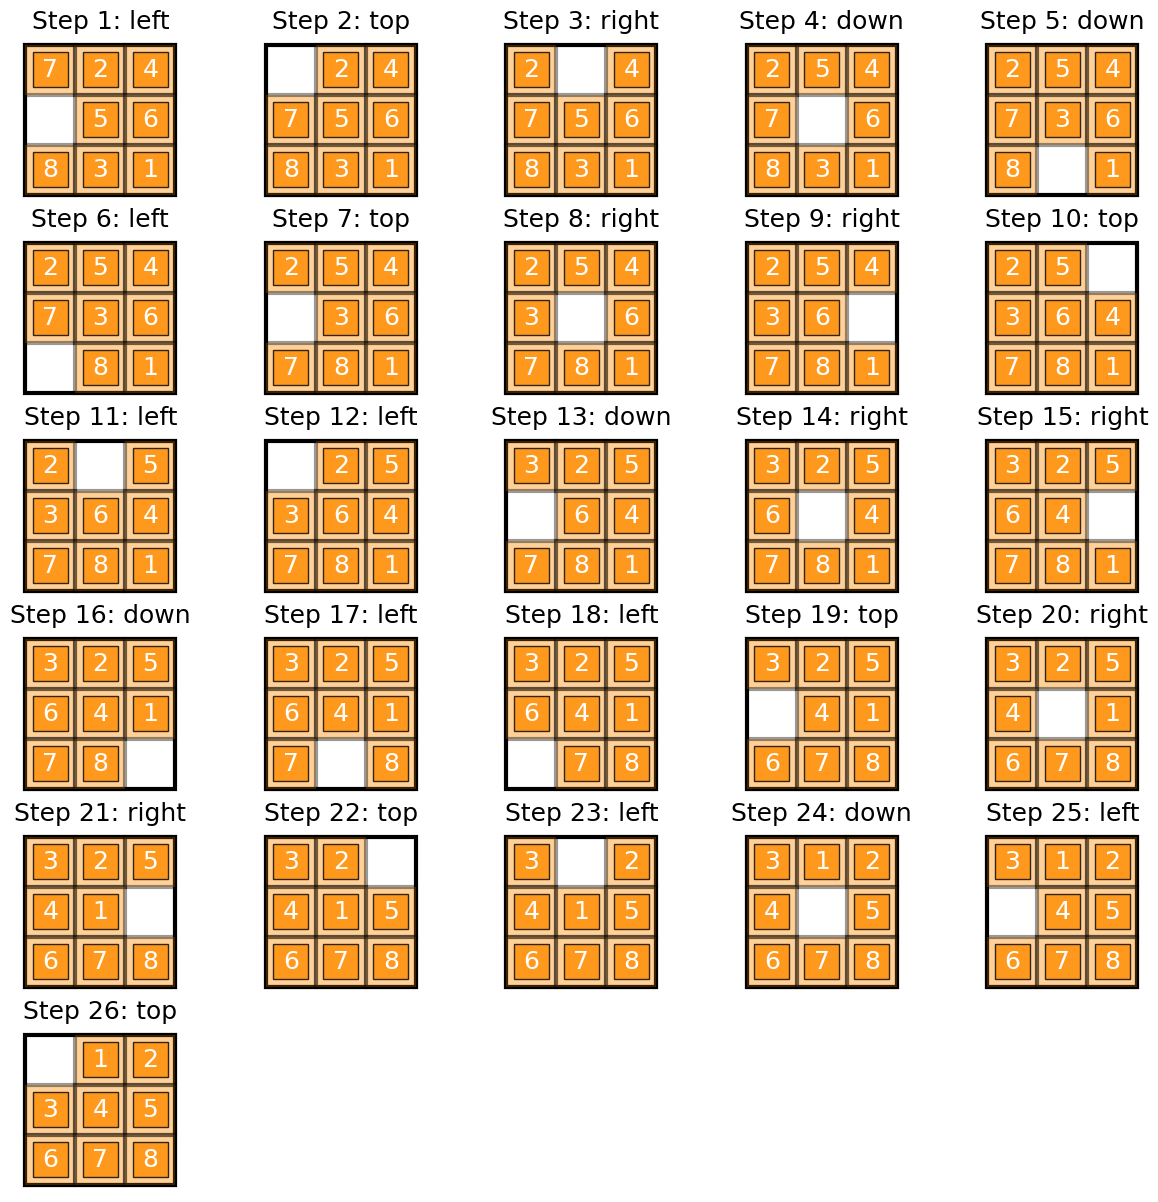

In [12]:
# Fungsi untuk mendapatkan penggunaan memori saat ini
def get_memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / (1024 * 1024)  # Dalam megabyte

if __name__ == "__main__":
    state = start_tiles

    initial_state = NPuzzleState(tiles=state)

    print("Start Node:")
    print(initial_state)

    start_time = time.time()  # Waktu awal eksekusi pencarian

    result = recursiveBFS(state)
    end_time = time.time()  # Waktu akhir eksekusi pencarian
    execution_time = end_time - start_time  # Waktu total eksekusi

    current_state = Puzzle(state=state, parent=None, action=None, path_cost=0, needs_hueristic=True)

    row_count = int(len(result) / 5)
    fig, ax = plt.subplots(row_count + 1, 5, figsize=(15, 3 * row_count), sharex=True, sharey= True)
    for i in range (len(result), (row_count+1)*5):
            ax[i // 5, i % 5].set_visible(False)

    total_nodes_generated = 0
    num_steps = len(result)
    max_depth = 0
    res_arr = np.array([])

    for i, action in enumerate(result):
        children = current_state.generate_child()

        total_nodes_generated += len(children)

        for child in children:
            if child.action == action:
                current_state = child
                break

        max_depth = max(max_depth, current_state.path_cost)

        current_state_str = [[current_state.state[0], current_state.state[1], current_state.state[2]],
                             [current_state.state[3], current_state.state[4], current_state.state[5]],
                             [current_state.state[6], current_state.state[7], current_state.state[8]]]

        state_print = [
            current_state.state[0], current_state.state[1], current_state.state[2],
            current_state.state[3], current_state.state[4], current_state.state[5],
            current_state.state[6], current_state.state[7], current_state.state[8]]

        state_print = NPuzzleState(tiles=state_print)
        state_print.plot(ax[(i) // 5][(i) % 5], f'Step {i+1}: {action}', fs=18)

        res_arr = np.append(res_arr, state_print)

    print("\nTotal nodes generated:", total_nodes_generated)
    print("Total execution time:", execution_time, "seconds")
    print("Memory usage at the end:", get_memory_usage(), "MB")
    print("Total number of steps:", num_steps)
    print("Maximum depth reached:", max_depth)
    print("Actions that are taken:")

    for i, action in enumerate(result, 1):
        if i < len(result):
            print(action, end=", " if i % 7 != 0 else ", \n")
        else:
            print(action)


#### Fungsi `get_memory_usage()`

Fungsi ini digunakan untuk mengukur penggunaan memori saat ini oleh proses. Ini mengambil penggunaan memori dalam byte dan mengonversinya menjadi megabyte.

#### Blok Utama `if __name__ == "__main__":`

- Mulai eksekusi kode utama dengan inisialisasi keadaan awal `state` untuk permainan teka-teki.
- Waktu dimulai dihitung menggunakan `start_time`.
- Pencarian solusi dijalankan menggunakan fungsi `recursiveBFS`, dan hasilnya disimpan dalam variabel `result`.
- Waktu akhir eksekusi dicatat dengan `end_time`, dan total waktu eksekusi dihitung.
- Objek `current_state` dibuat dengan menggunakan keadaan awal.
- Plot disiapkan dengan membuat subplot berdasarkan jumlah langkah yang diperlukan dalam solusi.
- Variabel `total_nodes_generated`, `num_steps`, dan `max_depth` diinisialisasi untuk menghitung total node yang dihasilkan, jumlah langkah, dan kedalaman maksimum.
- Array `res_arr` juga dibuat untuk menyimpan keadaan permainan pada setiap langkah.

#### Loop Langkah

Selanjutnya, melakukan loop melalui setiap langkah dalam solusi yang ditemukan (`result`):
- Menghasilkan anak-anak dari `current_state` menggunakan metode `generate_child()`.
- Menghitung total node yang dihasilkan dan mengidentifikasi anak yang sesuai dengan langkah yang diambil.
- Memperbarui kedalaman maksimum jika diperlukan.
- Mengonversi `current_state` menjadi format yang sesuai untuk dicetak dan memplotnya dalam subplot yang sesuai.
- Juga memperbarui `res_arr` dengan keadaan permainan saat ini.

#### Informasi Akhir

Setelah semua langkah selesai, mencetak informasi penting sebagai berikut:
- Total node yang dihasilkan.
- Total waktu eksekusi.
- Penggunaan memori pada akhir eksekusi.
- Total jumlah langkah.
- Kedalaman maksimum yang tercapai.
- Langkah-langkah yang diambil selama pencarian.

# Analisis Perbandingan Algoritma

### Kelebihan IDA* Algorithm
- Langkah yang diberikan selalu yang terbaik dan tercepat berdasarkan pemilihan heuristik
- Pengguna dapat leluasa mengoptimasi programmnya sesuai keinginan (bisa mengefisienkan memori penggunaan, pencarian parsial, dan sebagainya)

### Kekurangan IDA* Algorithm
- Memerlukan waktu eksekusi yang lama
- Tidak efisien untuk permasalahan graf yang dangkal

### Kelebihan RBFS
- Selama heuristiknya tidak melebihi actual cost, maka algoritma akan menemukan solusi yang optimal
- Dapat mengurangi jumlah node yang dieksplorasi dibandingkan dengan algoritma BFS dan DFS
### Kekurangan RBFS
- Memerlukan penggunaan memori yang besar karena adanya proses rekursi
- Jika heuristik tidak konsisten, algoritma memerlukan banyak waktu untuk melakukan backtracking
- Tidak cocok untuk permasalahan dengan ruang lingkup yang besar

# IDA* vs RBFS
- Waktu eksekusi: RBFS (35s  vs  __±10s__)
- Memori yang lebih efisien: IDA* (__±1 MB__  vs  ±303 MB)
- Total node yang dibuat: RBFS (1265719  vs  __77__)
- Keduanya berhasil menunjukkan langkah dari start ke goal dengan optimal

# Sekian, Terima kasih

Saya Budiman -2023-